<a href="https://colab.research.google.com/github/fdolucas6/ML-and-DL-projects/blob/main/Ls_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Case Study

### 1. Credit Score Classification

In [ ]:
import kagglehub
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

# Download dataset from Kaggle
dataset_path = kagglehub.dataset_download("parisrohan/credit-score-classification")

# Locate the CSV file (modify if needed)
csv_file = os.path.join(dataset_path, "train.csv")  # Adjust if filename differs

# Load dataset
df = pd.read_csv(csv_file)

# Drop unnecessary columns
X = df.drop(columns=["ID", "Credit_Score", "Customer_ID"])
y = df["Credit_Score"]

# Encode categorical features using Label Encoding (low memory usage)
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Convert the column to string type before fitting LabelEncoder
    X[col] = X[col].astype(str)  # This line is added to fix the error
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for future use

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Predicting new sample (example)
sample = X_test.iloc[:1]  # Taking one sample
predicted_score = model.predict(sample)
print("Predicted Credit Score for Sample:", predicted_score[0])

<ipython-input-2-b8b06704ab37>:16: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Model Accuracy: 0.7826
Predicted Credit Score for Sample: Good


## 2. Food Delivery Time Prediction

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

# Read in the data and display the first few rows
fd = pd.read_csv('/content/train.csv')

fd.head(20)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [ ]:
df = fd[~fd["Time_Orderd"].str.contains("NaN", case=False, na=False)].sum()
print(df.value_counts)
fd['Time_taken(min)'] = pd.to_numeric(fd['Time_taken(min)'].str.extract('(\d+)', expand=False), errors='coerce')

# Separate features and target variable
X = fd.drop(['Time_taken(min)', "ID", "Delivery_person_ID", "Delivery_person_Age", "Order_Date"], axis=1).copy()
Y = fd['Time_taken(min)'].copy()


<bound method IndexOpsMixin.value_counts of ID                             0x4607 0xb379 0x5d6d 0x7a6a 0x70a2 0x9bb4 0x95...
Delivery_person_ID             INDORES13DEL02 BANGRES18DEL02 BANGRES19DEL01 C...
Delivery_person_Age            3734233832223335223621233424293533342125313733...
Delivery_person_Ratings        4.94.54.44.74.64.84.74.64.84.24.74.74.34.74.54...
Restaurant_latitude                                                756267.313505
Restaurant_longitude                                              3103891.441537
Delivery_location_latitude                                          765938.70093
Delivery_location_longitude                                       3106680.841598
Order_Date                     19-03-202225-03-202219-03-202205-04-202226-03-...
Time_Orderd                    11:30:0019:45:0008:30:0018:00:0013:30:0021:20:...
Time_Order_picked              11:45:0019:50:0008:45:0018:10:0013:45:0021:30:...
Weatherconditions              conditions Sunnyconditions Stormyc

In [ ]:

# Encode categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X["Weatherconditions"] = le.fit_transform(X["Weatherconditions"])
X["Road_traffic_density"] = le.fit_transform(X["Road_traffic_density"])
X["Type_of_order"] = le.fit_transform(X["Type_of_order"])
X["Type_of_vehicle"] = le.fit_transform(X["Type_of_vehicle"])
X["Festival"] = le.fit_transform(X["Festival"])
X["City"] = le.fit_transform(X["City"])
print(X.head(10))

# Convert time columns to datetime format
X['Time_Orderd'] = pd.to_datetime(X['Time_Orderd'], errors='coerce')
X['Time_Order_picked'] = pd.to_datetime(X['Time_Order_picked'], errors='coerce')

X['Time_Difference'] = (X['Time_Order_picked'] - X['Time_Orderd']).dt.total_seconds() / 60

# Convert to integer type
X['Time_Difference'] = X['Time_Difference'].astype('Int64')  # Use Int64 to handle any NaNs if present

print(X.head(10))

# Define a function to categorize the time
def categorize_time(time_obj):
    if pd.isna(time_obj):
        return np.nan  # Handle missing values
    hour = time_obj.hour
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize 'Time_Orderd' by time of day
X['Time_Category'] = X['Time_Order_picked'].apply(categorize_time)

# Display the updated DataFrame
print(X.head(5))

X["Time_Category"] = le.fit_transform(X["Time_Category"])
print(X.head(5))
X = X.drop(columns=['Time_Orderd', 'Time_Order_picked'])
print(X.head(10))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                     4.9            22.745049             75.892471   
1                     4.5            12.913041             77.683237   
2                     4.4            12.914264             77.678400   
3                     4.7            11.003669             76.976494   
4                     4.6            12.972793             80.249982   
5                     4.8            17.431668             78.408321   
6                     4.7            23.369746             85.339820   
7                     4.6            12.352058             76.606650   
8                     4.8            17.433809             78.386744   
9                     4.2            30.327968             78.046106   

   Delivery_location_latitude  Delivery_location_longitude Time_Orderd  \
0                   22.765049                    75.912471    11:30:00   
1                   13.043041                    77.813237 

<ipython-input-3-e9dfe6ed2e3f>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time_Orderd'] = pd.to_datetime(X['Time_Orderd'], errors='coerce')
<ipython-input-3-e9dfe6ed2e3f>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time_Order_picked'] = pd.to_datetime(X['Time_Order_picked'], errors='coerce')


  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                     4.9            22.745049             75.892471   
1                     4.5            12.913041             77.683237   
2                     4.4            12.914264             77.678400   
3                     4.7            11.003669             76.976494   
4                     4.6            12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude  \
0                   22.765049                    75.912471   
1                   13.043041                    77.813237   
2                   12.924264                    77.688400   
3                   11.053669                    77.026494   
4                   13.012793                    80.289982   

          Time_Orderd   Time_Order_picked  Weatherconditions  \
0 2024-12-06 11:30:00 2024-12-06 11:45:00                  5   
1 2024-12-06 19:45:00 2024-12-06 19:50:00                  4   
2 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Dropping any rows with NaN values
X = X.dropna()
Y = Y.loc[X.index]  # Align Y with the remaining rows in X after dropping NaNs

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Initialize the Linear Regression model
regr = LinearRegression()

# Fit the model on training data
regr.fit(X_train, y_train)

# Print the model's intercept and coefficients
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)

# Predict on the test set
res = regr.predict(X_test)
print("Predictions:", res)
print("Actual values:", y_test.values)

# Evaluate model performance
print("Model score (R^2):", regr.score(X_test, y_test))


Intercept: 6361.974641643939
Coefficients: [-4.06736997e+01  5.87662789e-01 -1.26356083e+04 -8.06038515e-01
  6.32926209e+03 -4.41658742e+00 -6.96755960e+00 -6.38084563e+00
  7.63652254e-02 -1.42073816e+00  1.13412225e+01  2.19305435e+01
 -2.36938669e+00  2.63378480e+00 -4.00679849e+00]
Predictions: [25.17341277 24.68160647 22.58439049 ... 28.88611231 18.52162777
 30.21788826]
Actual values: [23 42 49 ... 39 17 16]
Model score (R^2): 0.48799295227845996


## 3. Language detection

In [ ]:
pip install pandas numpy scikit-learn nltk matplotlib

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Language Detection.csv")  # Replace with your dataset's path

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display unique languages
print("Unique languages:", df['Language'].unique())


                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
Text        0
Language    0
dtype: int64
Unique languages: ['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into features and labels
X = df['Text']  # Assuming the text column is named 'Text'
y = df['Language']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9506769825918762
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.93      0.97       106
      Danish       1.00      0.89      0.94        73
       Dutch       0.98      0.95      0.96       111
     English       0.80      1.00      0.89       291
      French       0.96      0.98      0.97       219
      German       1.00      0.95      0.97        93
       Greek       1.00      0.93      0.96        68
       Hindi       1.00      0.60      0.75        10
     Italian       1.00      0.94      0.97       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.98      0.93      0.95       144
     Russian       1.00      0.93      0.96       136
     Spanish       0.95      0.95      0.95       160
    Sweedish       0.95      0.98      0.97       133
       Tamil       1.00      0.99      0.99        87
     Turkish       1.00     

In [ ]:
import joblib

joblib.dump(model, "language_detection_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
# Load the model and vectorizer
model = joblib.load("language_detection_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Predict the language of new text
new_text = ["Bonjour, comment ça va?"]  # Replace with your input text
new_text_tfidf = vectorizer.transform(new_text)
predicted_language = model.predict(new_text_tfidf)
print("Predicted Language:", predicted_language[0])


Predicted Language: French


## 4. Plant Classification

In [ ]:
pip install tensorflow kaggle opencv-python matplotlib numpy

In [ ]:
import kagglehub
dataset_path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")

# Ensure dataset_path is a string, not a list
if isinstance(dataset_path, list):
    dataset_path = dataset_path[0]

# Print path to verify
print("Dataset downloaded to:", dataset_path)


100%|██████████| 937M/937M [00:26<00:00, 37.3MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16


In [ ]:
import os

# Define base directory (where dataset is stored)
base_dir = os.path.join(dataset_path, "split_ttv_dataset_type_of_plants")

# Define paths for train, validation, and test sets
train_dir = os.path.join(base_dir, "Train_Set_Folder")
val_dir = os.path.join(base_dir, "Validation_Set_Folder")
test_dir = os.path.join(base_dir, "Test_Set_Folder")

# Verify paths exist
print("Train Directory Exists:", os.path.exists(train_dir))
print("Validation Directory Exists:", os.path.exists(val_dir))
print("Test Directory Exists:", os.path.exists(test_dir))


Train Directory Exists: True
Validation Directory Exists: True
Test Directory Exists: True


In [ ]:
# List folders inside dataset
print("Contents of dataset folder:", os.listdir(base_dir))


Contents of dataset folder: ['Validation_Set_Folder', 'Train_Set_Folder', 'Test_Set_Folder']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Load datasets
train_data = datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                         batch_size=64, class_mode='categorical')

val_data = datagen.flow_from_directory(val_dir, target_size=(150, 150),
                                       batch_size=64, class_mode='categorical')

test_data = datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                        batch_size=64, class_mode='categorical')

# Print class labels
print("Class Labels:", train_data.class_indices)


Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.
Found 2998 images belonging to 30 classes.
Class Labels: {'aloevera': 0, 'banana': 1, 'bilimbi': 2, 'cantaloupe': 3, 'cassava': 4, 'coconut': 5, 'corn': 6, 'cucumber': 7, 'curcuma': 8, 'eggplant': 9, 'galangal': 10, 'ginger': 11, 'guava': 12, 'kale': 13, 'longbeans': 14, 'mango': 15, 'melon': 16, 'orange': 17, 'paddy': 18, 'papaya': 19, 'peper chili': 20, 'pineapple': 21, 'pomelo': 22, 'shallot': 23, 'soybeans': 24, 'spinach': 25, 'sweet potatoes': 26, 'tobacco': 27, 'waterapple': 28, 'watermelon': 29}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │          15,390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,049,054 (72.67 MB)

 Trainable params: 19,049,054 (72.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1632s 4s/step - accuracy: 0.1530 - loss: 2.9145 - val_accuracy: 0.3617 - val_loss: 2.0427
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1554s 4s/step - accuracy: 0.3645 - loss: 2.0354 - val_accuracy: 0.4937 - val_loss: 1.6398
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1540s 4s/step - accuracy: 0.4517 - loss: 1.7621 - val_accuracy: 0.5436 - val_loss: 1.4594
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1527s 4s/step - accuracy: 0.5029 - loss: 1.5660 - val_accuracy: 0.5617 - val_loss: 1.3707
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1512s 4s/step - accuracy: 0.5383 - loss: 1.4591 - val_accuracy: 0.6099 - val_loss: 1.2048
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1543s 4s/step - accuracy: 0.5660 - loss: 1.3500 - val_accuracy: 0.6017 - val_loss: 1.2250
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1547s 4s/step - accuracy: 0.5882 - loss: 1.2805 - val_accuracy: 0.6376 - val_loss: 1.1375
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1524s 4s/step - accuracy: 0.6174 - loss: 1.2017 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


47/47 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6902 - loss: 0.9346
Test Accuracy: 0.7004669904708862


In [ ]:
import cv2
import numpy as np

# Load a sample test image
image_path = "/content/aug_0_10.jpg"

img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Expand dimensions for model input

# Predict the class
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# Get class labels
class_labels = list(train_data.class_indices.keys())

print(f"Predicted Plant Type: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Predicted Plant Type: banana


## 5. Signature Verification System

In [ ]:
!pip install kagglehub tensorflow keras matplotlib numpy pandas opencv-python scikit-learn

In [ ]:
import kagglehub
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Download dataset
dataset_path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

# Define base paths
train_base_path = os.path.join(dataset_path, "sign_data", "train")
test_base_path = os.path.join(dataset_path, "sign_data", "test")

# List all folders in train and test directories
train_folders = [f for f in os.listdir(train_base_path) if not f.endswith('.xlsx')]
test_folders = [f for f in os.listdir(test_base_path) if not f.endswith('.xlsx')]

print("Train Folders:", train_folders)
print("Test Folders:", test_folders)


Train Folders: ['064', '001_forg', '050', '049_forg', '055_forg', '017_forg', '020', '023', '029_forg', '045', '029', '031_forg', '013_forg', '042', '067_forg', '015_forg', '019_forg', '028_forg', '046_forg', '026_forg', '049', '031', '019', '044_forg', '034_forg', '056_forg', '035_forg', '060', '006', '027', '053_forg', '035', '055', '061', '024', '016_forg', '024_forg', '044', '063_forg', '032_forg', '066', '025_forg', '004_forg', '067', '048_forg', '046', '013', '037', '058', '062', '038_forg', '033_forg', '042_forg', '052_forg', '054', '039', '038', '057', '002', '061_forg', '036_forg', '059', '023_forg', '062_forg', '018_forg', '003_forg', '022_forg', '002_forg', '043', '066_forg', '021_forg', '025', '028', '030_forg', '069_forg', '018', '047_forg', '033', '051_forg', '057_forg', '068', '009_forg', '020_forg', '041', '004', '047', '040_forg', '030', '016', '048', '040', '068_forg', '063', '041_forg', '037_forg', '009', '065_forg', '060_forg', '015', '012_forg', '003', '012', '006_

In [ ]:
IMG_SIZE = (128, 128)

def load_images_from_folders(base_path, folders, label_map):
    image_paths = []
    labels = []

    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.isdir(folder_path):  # Skip non-folder files
            continue

        label = label_map(folder)  # Assign label based on folder name

        for file in os.listdir(folder_path):
            if file.endswith(".png"):
                image_paths.append(os.path.join(folder_path, file))
                labels.append(label)

    return image_paths, labels

# Function to assign labels (1 = Original, 0 = Forged)
def label_map(folder_name):
    return 1 if "_forg" not in folder_name else 0

# Load Train Data
train_image_paths, train_labels = load_images_from_folders(train_base_path, train_folders, label_map)

# Load Test Data
test_image_paths, test_labels = load_images_from_folders(test_base_path, test_folders, label_map)

# Shuffle the dataset
train_image_paths, train_labels = shuffle(train_image_paths, train_labels, random_state=42)
test_image_paths, test_labels = shuffle(test_image_paths, test_labels, random_state=42)

print(f"Train Data: {len(train_image_paths)} images")
print(f"Test Data: {len(test_image_paths)} images")


Train Data: 771 images
Test Data: 252 images


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, IMG_SIZE)  # Resize to uniform size
    img = img / 255.0  # Normalize pixel values
    return img

# Convert images to numpy arrays
X_train = np.array([preprocess_image(img) for img in train_image_paths]).reshape(-1, 128, 128, 1)
y_train = np.array(train_labels)

X_test = np.array([preprocess_image(img) for img in test_image_paths]).reshape(-1, 128, 128, 1)
y_test = np.array(test_labels)

print(f"Train Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Shape: {X_test.shape}, Labels: {y_test.shape}")


Train Shape: (771, 128, 128, 1), Labels: (771,)
Test Shape: (252, 128, 128, 1), Labels: (252,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.7878 - loss: 0.8041 - val_accuracy: 1.0000 - val_loss: 0.3026
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 405ms/step - accuracy: 0.8418 - loss: 0.4612 - val_accuracy: 1.0000 - val_loss: 0.0833
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.8528 - loss: 0.3600 - val_accuracy: 1.0000 - val_loss: 0.0706
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.9140 - loss: 0.2330 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.9446 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 485ms/step - accuracy: 0.9563 - loss: 0.1476 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 426ms/step - accuracy: 0.9678 - loss: 0.0992 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 457ms/step - accuracy: 0.9806 - loss: 0.0720 - val_accu

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 1.0000 - loss: 4.8427e-04
Test Accuracy: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


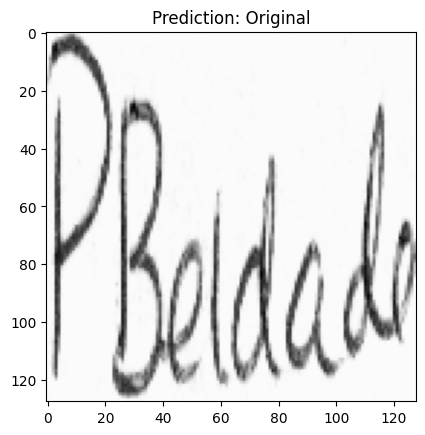

In [ ]:
# Predict on a new test signature
sample_image = preprocess_image(test_image_paths[10]).reshape(1, 128, 128, 1)
prediction = model.predict(sample_image)

# Display Result
plt.imshow(sample_image.reshape(128, 128), cmap="gray")
plt.title(f"Prediction: {'Original' if prediction > 0.5 else 'Forged'}")
plt.show()


## Cartoonify Image with Machine Learning

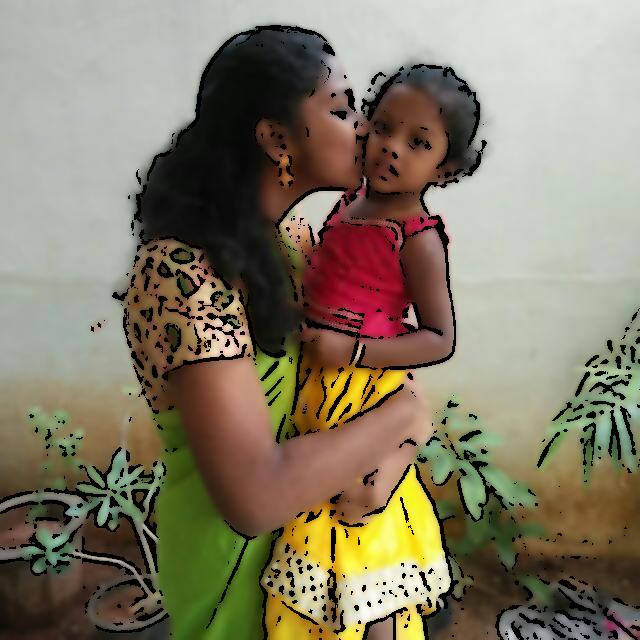

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cartoonify(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply median blur
    gray_blur = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, blockSize=9, C=9)

    # Apply bilateral filter to smooth colors while keeping edges
    color = cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)

    # Combine edges with the smoothened image
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    return cartoon

# Load and cartoonify an image
image_path = "/content/❄Snow❄ 20181114_180744.jpg"
cartoon_image = cartoonify(image_path)

# Show output using cv2_imshow
cv2_imshow(cartoon_image)


## Iris Flowers Classification Project

In [ ]:
from sklearn import datasets
import pandas as pd

# Load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add species labels

# Map species names
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print(df.head())  # Show first 5 rows


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target labels

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape[0], "Testing Samples:", X_test.shape[0])


Training Samples: 120 Testing Samples: 30


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [ ]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # Example input
prediction = model.predict(new_flower)

print("Predicted Species:", prediction[0])


Predicted Species: Setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Emojify – Create your own emoji with Python

In [ ]:
pip install tensorflow keras opencv-python matplotlib numpy

In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

# Print the path
print("Dataset downloaded to:", dataset_path)


Dataset downloaded to: /root/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1


In [ ]:
import os

# Correctly join the dataset path
dataset_root = dataset_path  # Ensure dataset_path is a string, not a list
train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")

# Verify if directories exist
print("Train Directory Exists:", os.path.exists(train_dir))
print("Test Directory Exists:", os.path.exists(test_dir))


Train Directory Exists: True
Test Directory Exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=(48, 48),
                                         batch_size=64, color_mode="grayscale",
                                         class_mode="categorical")

test_data = datagen.flow_from_directory(test_dir, target_size=(48, 48),
                                        batch_size=64, color_mode="grayscale",
                                        class_mode="categorical")



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,353,351 (12.79 MB)

 Trainable params: 3,353,351 (12.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 284s 624ms/step - accuracy: 0.2803 - loss: 1.7706 - val_accuracy: 0.4289 - val_loss: 1.4961
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 258s 573ms/step - accuracy: 0.4210 - loss: 1.5086 - val_accuracy: 0.4532 - val_loss: 1.4091
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 268s 586ms/step - accuracy: 0.4673 - loss: 1.3850 - val_accuracy: 0.4877 - val_loss: 1.3257
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 286s 636ms/step - accuracy: 0.4933 - loss: 1.3283 - val_accuracy: 0.5042 - val_loss: 1.2901
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 259s 577ms/step - accuracy: 0.5160 - loss: 1.2706 - val_accuracy: 0.5111 - val_loss: 1.2675
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 314s 692ms/step - accuracy: 0.5344 - loss: 1.2245 - val_accuracy: 0.5155 - val_loss: 1.2583
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 256s 571ms/step - accuracy: 0.5490 - loss: 1.1823 - val_accuracy: 0.5290 - val_loss: 1.2299
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 256s 557ms/step - accuracy: 0.5795 - loss: 1.11

In [ ]:
import cv2
import numpy as np

# Define emotion categories
emotion_dict = {0: "Angry 😠", 1: "Disgust 🤢", 2: "Fear 😨", 3: "Happy 😃",
                4: "Neutral 😐", 5: "Sad 😢", 6: "Surprise 😲"}

# Load an image for prediction
# Replace "path/to/face.jpg" with the actual path to your image file
img_path = "/content/2018-07-15-11-17-30-243.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image at '{img_path}'")
else:
    img = cv2.resize(img, (48, 48))
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1) # Add channel dimension
    img = img / 255.0  # Normalize

    # Predict emotion
    pred = model.predict(img)
    emotion = emotion_dict[np.argmax(pred)]

    print("Predicted Emotion:", emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Emotion: Angry 😠


In [ ]:
# Install Kaggle API if not already installed
!pip install kagglehub pandas scikit-learn

# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score


In [ ]:
# Download dataset
dataset_path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

# Ensure dataset_path is a string, not a list
if isinstance(dataset_path, list):
    dataset_path = dataset_path[0]

print("Dataset downloaded to:", dataset_path)


100%|██████████| 12.6k/12.6k [00:00<00:00, 2.38MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/altruistdelhite04/loan-prediction-problem-dataset/versions/1


In [ ]:
# Define the dataset path
data_file = os.path.join(dataset_path, "train_u6lujuX_CVtuZ9i.csv")

# Load dataset
df = pd.read_csv(data_file)

# Display first few rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)
# Replace '3+' with 3 in the 'Dependents' column
df['Dependents'] = df['Dependents'].str.replace('3+', '3').astype(int)
# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical variables into numerical using Label Encoding
label_encoders = {}
for col in ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for later decoding


Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-7-4141838c9bb3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Features for Loan Amount Prediction (Regression)
X_reg = df[["Married", "Education", "Dependents", "Self_Employed", "ApplicantIncome", "CoapplicantIncome"]]
y_reg = df["LoanAmount"]

# Features for Loan Approval Prediction (Classification)
X_class = df[["Married", "Education", "Dependents", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
y_class = df["Loan_Status"]

# Split dataset into training and testing sets (80-20)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [ ]:
# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Predict Loan Amount
y_pred_reg = lr_model.predict(X_test_reg)

# Evaluate Model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (Loan Amount Prediction): {mae:.2f}")


Mean Absolute Error (Loan Amount Prediction): 37.63


In [ ]:
# Train a RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Predict Loan Approval
y_pred_class = rf_model.predict(X_test_class)

# Evaluate Classification Model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Loan Approval Prediction Accuracy: {accuracy:.2f}")


Loan Approval Prediction Accuracy: 0.63


In [ ]:
# Example input for a new user
new_user = np.array([[1, 1, 2, 0, 5000, 0]])  # Example values

# Predict Loan Amount
predicted_loan_amount = lr_model.predict(new_user[:, :6])  # Predict LoanAmount using the first 6 features
new_user_with_loan_amount = np.concatenate([new_user, predicted_loan_amount.reshape(-1, 1)], axis=1)

# Predict Loan Approval
predicted_loan_approval = rf_model.predict(new_user_with_loan_amount)
print("Loan Approved" if predicted_loan_approval[0] == 1 else "Loan Denied")


Loan Approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Housing Prices Prediction Project

In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from sklearn.datasets import fetch_openml

# Load dataset from OpenML (Latest Version)
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Convert to DataFrame
df = boston.frame

# Display first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Check dataset information
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB

Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Drop missing values (if any)
df.dropna(inplace=True)


In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=["MEDV"])  # Remove target variable
y = df["MEDV"]  # Target variable


In [ ]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict House Prices
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
print(" Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


 Linear Regression Performance:
MAE: 3.189091965887848
MSE: 24.291119474973513
R² Score: 0.668759493535632


In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict House Prices
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print(" Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


 Random Forest Performance:
MAE: 2.041078431372549
MSE: 7.912745333333333
R² Score: 0.8920995891343227


In [ ]:
# Example New House Data (CRIM, RM, TAX, PTRATIO, LSTAT, etc.)
new_house = np.array([[0.2, 6.5, 300, 15, 5,
                       0, 0, 0, 0, 0, 0, 0, 0]])  # Example values
new_house_scaled = scaler.transform(new_house)  # Scale new data

# Predict Price
predicted_price = rf_model.predict(new_house_scaled)
print(f"Predicted House Price: ${predicted_price[0] * 1000:.2f}")


Predicted House Price: $42418.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## MNIST Digit Classification Machine Learning Project

In [ ]:
# Install necessary libraries
!pip install tensorflow numpy matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 28, 28), Labels: (60000,)
Testing Data Shape: (10000, 28, 28), Labels: (10000,)


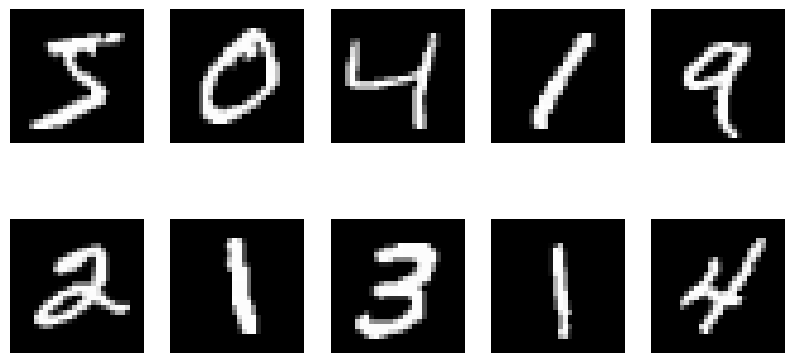

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shape
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")

# Display some images from the dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
# Normalize images (Convert pixel values to range 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# Reshape images to include a single channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (0-9)
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train CNN Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 95ms/step - accuracy: 0.8728 - loss: 0.4082 - val_accuracy: 0.9857 - val_loss: 0.0431
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9834 - loss: 0.0505 - val_accuracy: 0.9852 - val_loss: 0.0460
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9939 - loss: 0.0199 - val_accuracy: 0.9905 - val_loss: 0.0333
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9911 - val_loss: 0.0309
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 120s 102ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9901 - val_loss: 0.0321
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 100s 106ms/step - accuracy: 0.9963 - loss: 0.011

In [ ]:
# Evaluate Model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9889 - loss: 0.0400

Test Accuracy: 0.9916


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


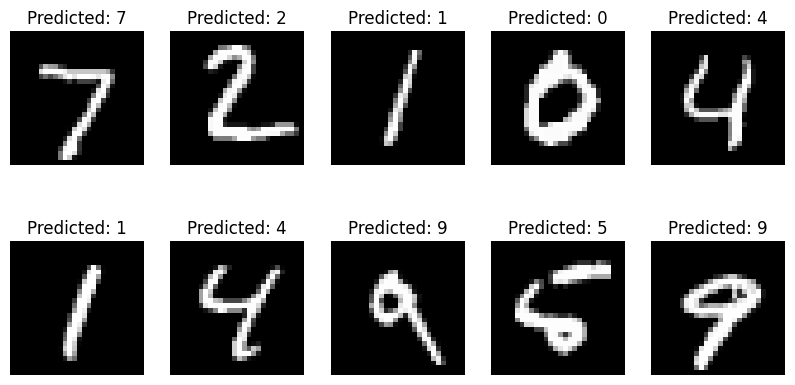

In [ ]:
# Predict on Test Data
predictions = model.predict(X_test)

# Display Some Predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


## Uber Data Analysis Project

In [ ]:
# Install KaggleHub
!pip install kagglehub

# Install required libraries for data analysis and visualization
!pip install pandas matplotlib seaborn


In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("fivethirtyeight/uber-pickups-in-new-york-city")

# Print the path
print("Dataset downloaded to:", dataset_path)


100%|██████████| 109M/109M [00:03<00:00, 33.1MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/fivethirtyeight/uber-pickups-in-new-york-city/versions/2


In [ ]:
import pandas as pd

# Define the file paths for the different months
files = [
    "uber-raw-data-apr14.csv",
    "uber-raw-data-aug14.csv",
    "uber-raw-data-jul14.csv",
    "uber-raw-data-jun14.csv",
    "uber-raw-data-may14.csv",
    "uber-raw-data-sep14.csv"
]

# Load the datasets into a list of DataFrames
dataframes = [pd.read_csv(f"{dataset_path}/{file}") for file in files]

# Concatenate the DataFrames into a single DataFrame
uber_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the concatenated data
uber_data.head()


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
# Check for missing values
print("\nMissing Values:\n", uber_data.isnull().sum())

# Convert pickup_time to datetime format if it exists
uber_data['pickup_time'] = pd.to_datetime(uber_data['Date/Time'])

# Check the data after preprocessing
print("\nData after Preprocessing:\n", uber_data.head())



Missing Values:
 Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Data after Preprocessing:
           Date/Time      Lat      Lon    Base         pickup_time
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512 2014-04-01 00:11:00
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512 2014-04-01 00:17:00
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512 2014-04-01 00:21:00
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512 2014-04-01 00:28:00
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512 2014-04-01 00:33:00


In [ ]:
# Extract Date Features: hour, weekday, and month
uber_data['hour'] = uber_data['pickup_time'].dt.hour
uber_data['weekday'] = uber_data['pickup_time'].dt.weekday
uber_data['month'] = uber_data['pickup_time'].dt.month


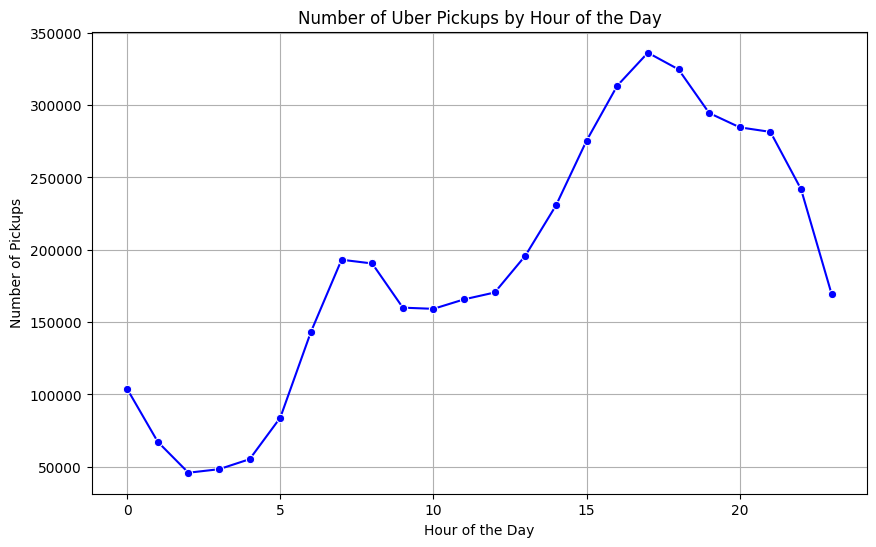

In [ ]:
# Count number of pickups per hour
rides_by_hour = uber_data['hour'].value_counts().sort_index()

# Plot the number of Uber pickups by hour of the day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x=rides_by_hour.index, y=rides_by_hour.values, marker='o', color='b')
plt.title("Number of Uber Pickups by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.show()


<ipython-input-45-dcdae7ba1a0c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rides_by_weekday.index, y=rides_by_weekday.values, palette='viridis')


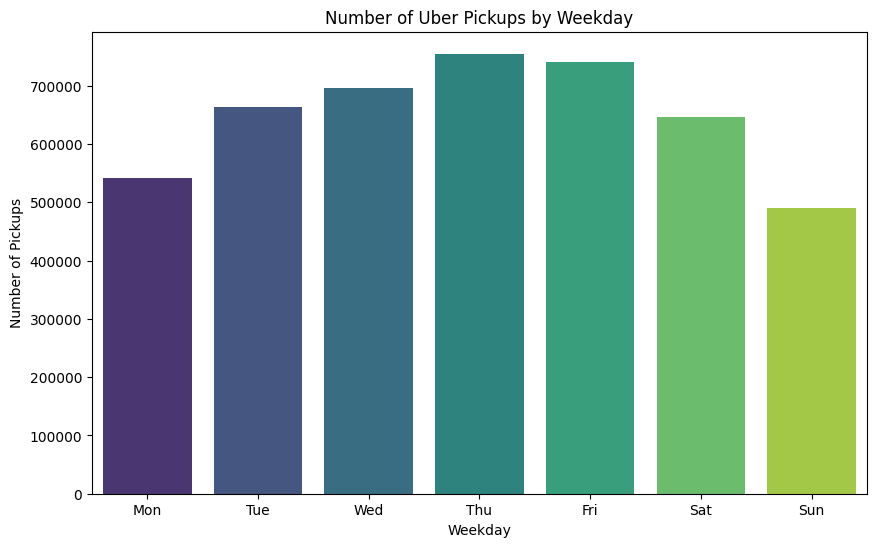

In [ ]:
# Count number of pickups per weekday
rides_by_weekday = uber_data['weekday'].value_counts().sort_index()

# Plot the number of Uber pickups by weekday
plt.figure(figsize=(10,6))
sns.barplot(x=rides_by_weekday.index, y=rides_by_weekday.values, palette='viridis')
plt.title("Number of Uber Pickups by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Pickups")
plt.xticks(ticks=np.arange(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


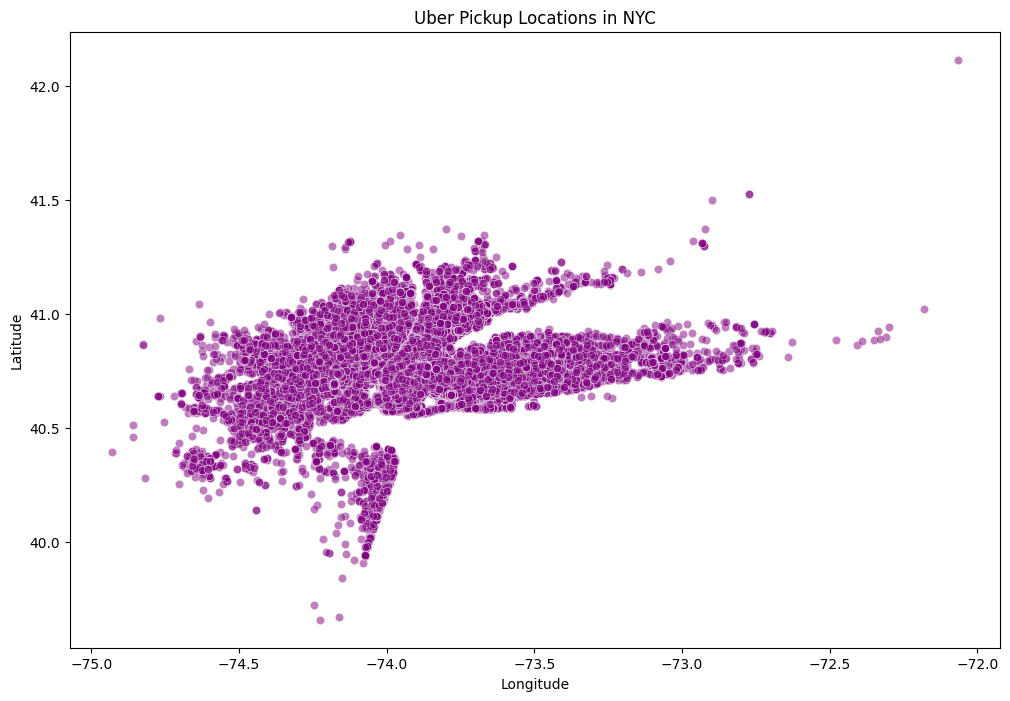

In [ ]:
# Plot pickup locations on a scatter plot (latitude vs longitude)
plt.figure(figsize=(12,8))
# Assuming 'Lon' is the correct column name for Longitude and 'Lat' is the column name for Latitude
sns.scatterplot(x=uber_data['Lon'], y=uber_data['Lat'], alpha=0.5, color='purple')
plt.title("Uber Pickup Locations in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Calculate peak hours based on the most frequent rides
peak_hour = uber_data.groupby('hour').size().idxmax()
print(f"Peak hour for Uber rides: {peak_hour}:00")


Peak hour for Uber rides: 17:00


## Credit Card Fraud Detection Project

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Extract correct file path
dataset_path = os.path.join(path, "Mall_Customers.csv")

# Load dataset
df = pd.read_csv(dataset_path)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

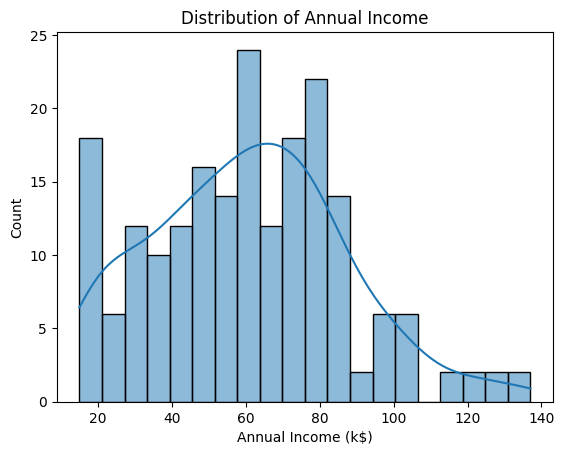

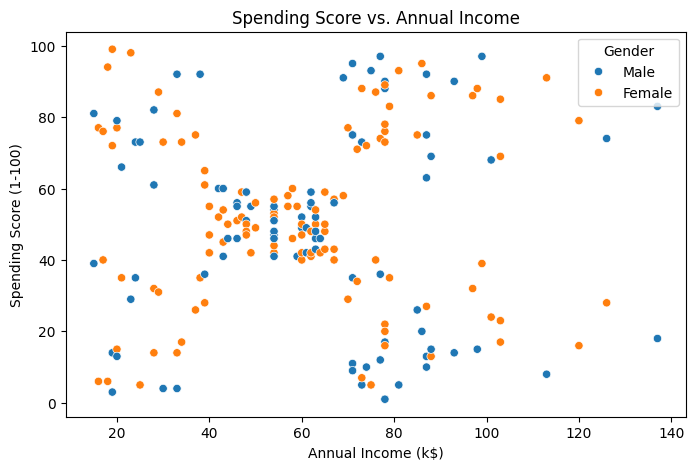

In [ ]:
# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

# Spending Score vs. Annual Income
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Spending Score vs. Annual Income")
plt.show()


In [ ]:
# Selecting features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Show clustered data
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


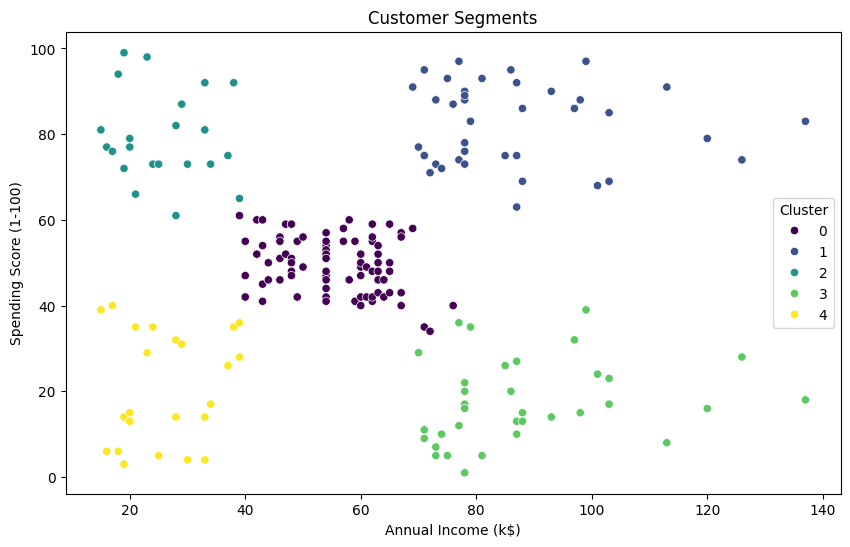

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segments")
plt.show()


## Speech Emotion Recognition Machine Learning Project

In [ ]:
import kagglehub
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:

# Download dataset from Kaggle
path = kagglehub.dataset_download("dmitrybabko/speech-emotion-recognition-en")

# Check dataset contents
dataset_contents = os.listdir(path)
print(f"Contents of {path}: {dataset_contents}")

# Set correct RAVDESS folder path (case-sensitive)
ravdess_path = os.path.join(path, "Ravdess")  # Corrected folder name

if os.path.exists(ravdess_path):
    print(f"✅ RAVDESS dataset found at: {ravdess_path}")
    print("Files in RAVDESS:", os.listdir(ravdess_path)[:5])  # Show first 5 files
else:
    print("❌ RAVDESS dataset folder not found. Check dataset structure.")

Contents of /root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1: ['Tess', 'Savee', 'Crema', 'Ravdess']
✅ RAVDESS dataset found at: /root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess
Files in RAVDESS: ['audio_speech_actors_01-24']


In [ ]:
import os
import glob

# Define the correct dataset path
ravdess_path = "/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24"

# Get all .wav files from subdirectories
audio_files = glob.glob(os.path.join(ravdess_path, "**/*.wav"), recursive=True)

print(f"Number of audio files found: {len(audio_files)}")
print("First 5 files:", audio_files[:5])  # Show first 5 files


Number of audio files found: 1440
First 5 files: ['/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-05-01-01-01-11.wav', '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-04-01-02-02-11.wav', '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-03-02-01-01-11.wav', '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-01-01-02-02-11.wav', '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24/Actor_11/03-01-05-01-02-01-11.wav']


In [ ]:
import numpy as np
import librosa
import os
import glob

def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)  # Take mean over time

# Define the correct dataset path
ravdess_path = "/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Ravdess/audio_speech_actors_01-24"

# Get all .wav files from subdirectories
audio_files = glob.glob(os.path.join(ravdess_path, "**/*.wav"), recursive=True)

# Prepare dataset
data = []
labels = []

for file_path in audio_files:
    file_name = os.path.basename(file_path)  # Extract filename
    emotion_label = file_name.split("-")[2]  # Extract emotion from filename
    feature = extract_features(file_path)
    data.append(feature)
    labels.append(emotion_label)

# Convert to numpy array
X = np.array(data)
y = np.array(labels)

print(f"Extracted features shape: {X.shape}")
print(f"Number of labels: {len(y)}")
print("First 5 labels:", y[:5])


Extracted features shape: (1440, 40)
Number of labels: 1440
First 5 labels: ['05' '04' '03' '01' '05']


In [ ]:
if X.size == 0 or y.size == 0:
    print("Error: X or y is empty. Check the dataset path and feature extraction process.")
else:
    # Encode labels
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Split into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40,1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train model
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1508 - loss: 10.0868 - val_accuracy: 0.2222 - val_loss: 2.0130
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2343 - loss: 2.0117 - val_accuracy: 0.2465 - val_loss: 1.9698
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2120 - loss: 1.9848 - val_accuracy: 0.2951 - val_loss: 1.9318
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2249 - loss: 1.9559 - val_accuracy: 0.3021 - val_loss: 1.8930
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2289 - loss: 1.9406 - val_accuracy: 0.2674 - val_loss: 1.9156
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2601 - loss: 1.9124 - val_accuracy: 0.3056 - val_loss: 1.8408
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2743 - loss: 1.8986 - val_accuracy: 0.3264 - val_loss: 1.8468
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2862 - loss: 1.8638 - val_accuracy: 0.3090 - val_loss: 1.826

In [ ]:
# Evaluate model
loss, acc = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {acc:.2f}")

# Predict on a sample
sample_idx = 5
sample_input = np.expand_dims(X_test[sample_idx], axis=(0,2))
predicted_emotion = encoder.inverse_transform([np.argmax(model.predict(sample_input))])
print("Predicted Emotion:", predicted_emotion[0])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3444 - loss: 1.6975 
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Emotion: 04


## Automatic License Number Plate Recognition System

In [ ]:
!pip install kagglehub ultralytics easyocr opencv-python numpy matplotlib

In [ ]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("dataturks/vehicle-number-plate-detection")

print("Dataset downloaded at:", dataset_path)


Dataset downloaded at: /root/.cache/kagglehub/datasets/dataturks/vehicle-number-plate-detection/versions/1


In [ ]:
!pip uninstall torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Would remove:
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/torch-2.6.0+cu118.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? y
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0+cu118
Uninstalling torchvision-0.21.0+cu118:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/torchvision-0.21.0+cu118.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libcudart.60cfec8e.so.11.0
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libjpeg.1c1c4b09.so.8
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libnvjpeg.70530407.so.11
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libpng16.0364a1db.so.16
    /usr/local

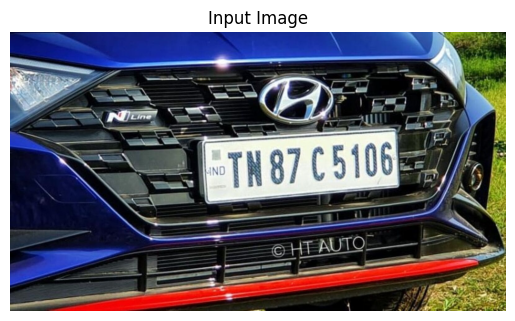

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Load a test image (replace with actual path)
image_path = os.path.join(dataset_path, "images", "/content/Plate_1711623405530_1711623405684.jpeg")
image = cv2.imread(image_path)

# Convert image to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the input image
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Input Image")
plt.show()


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
# Perform License Plate Detection using YOLO
results = model(image)

# Extract detected bounding boxes
for r in results:
    for box in r.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)  # Get bounding box coordinates
        plate_roi = image[y1:y2, x1:x2]  # Crop detected license plate



0: 384x640 1 train, 1 truck, 226.6ms
Speed: 6.0ms preprocess, 226.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


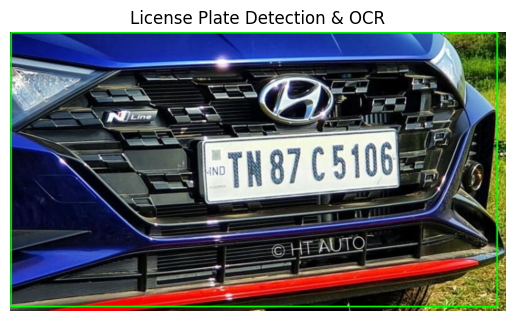

In [ ]:
import easyocr

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Convert plate to grayscale for better OCR performance
gray_plate = cv2.cvtColor(plate_roi, cv2.COLOR_BGR2GRAY)

# Recognize text from the plate
result = reader.readtext(gray_plate)

# Draw bounding box and text on the image
for (bbox, text, prob) in result:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show output image with detection
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("License Plate Detection & OCR")
plt.show()


## Fake News Detection Project

In [ ]:
pip install pandas numpy scikit-learn nltk


In [ ]:
import pandas as pd

# Load the dataset (change the path accordingly)
df = pd.read_csv("news.csv")

# Display the first few rows
print(df.head())


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()
y = df["label"]  # Assuming 'label' column exists


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9179163378058406
              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.92       628
        REAL       0.92      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
def predict_news(news_text):
    news_text = preprocess_text(news_text)
    vectorized_text = vectorizer.transform([news_text]).toarray()
    prediction = model.predict(vectorized_text)
    return "Real News" if prediction[0] == 1 else "Fake News"

# Test
print(predict_news("Breaking: Scientists discover a new planet!"))


Fake News


## Bitcoin Price Predictor Project

In [ ]:
pip install kagglehub pandas numpy scikit-learn tensorflow matplotlib seaborn


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("team-ai/bitcoin-price-prediction")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2


In [ ]:
import pandas as pd
import os

# Find the CSV file in the downloaded dataset
# The file name might be slightly different. Check the actual file name in the downloaded directory.
# Update the file name if necessary.
for filename in os.listdir(path):
    if filename.startswith("bitcoin_price"):
        csv_file = os.path.join(path, filename)
        break

# Load dataset
df = pd.read_csv(csv_file)

# Display first few rows
print(df.head())



           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  


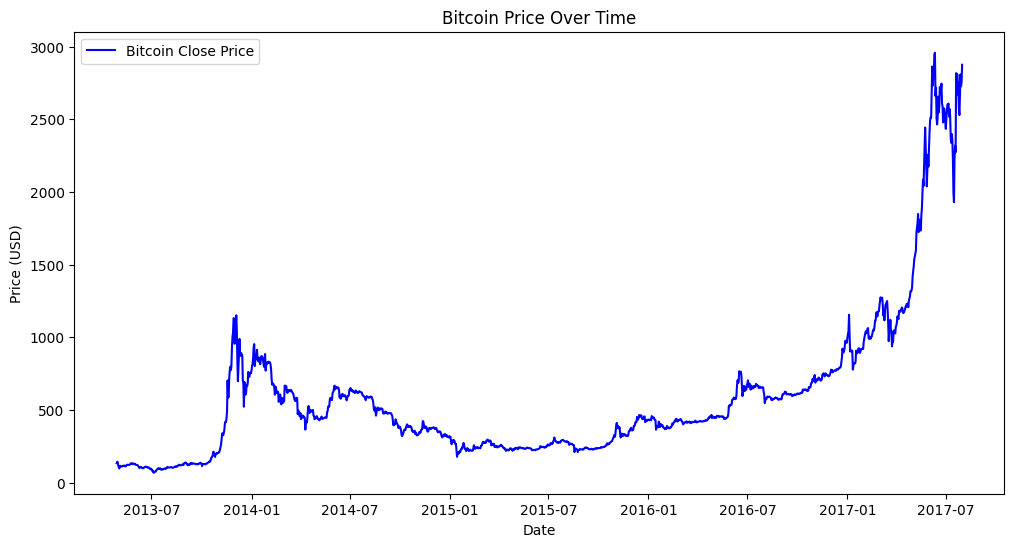

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot the Close Price over time
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Bitcoin Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the Close price
data = df["Close"].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(data_scaled, time_steps)

# Split into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])

# Compile Model
model.compile(optimizer="adam", loss="mse")

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0224
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 7.0709e-04
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.0641e-04
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.2232e-04
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8257e-04
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.3593e-04
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.9065e-04
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.0258e-04
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.6407e-04
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.7086e-04
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 12/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6242e-04
Epoch 13/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6681e-04
Epoch 14/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7400e-04
Epoch 15/20
78/78 ━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


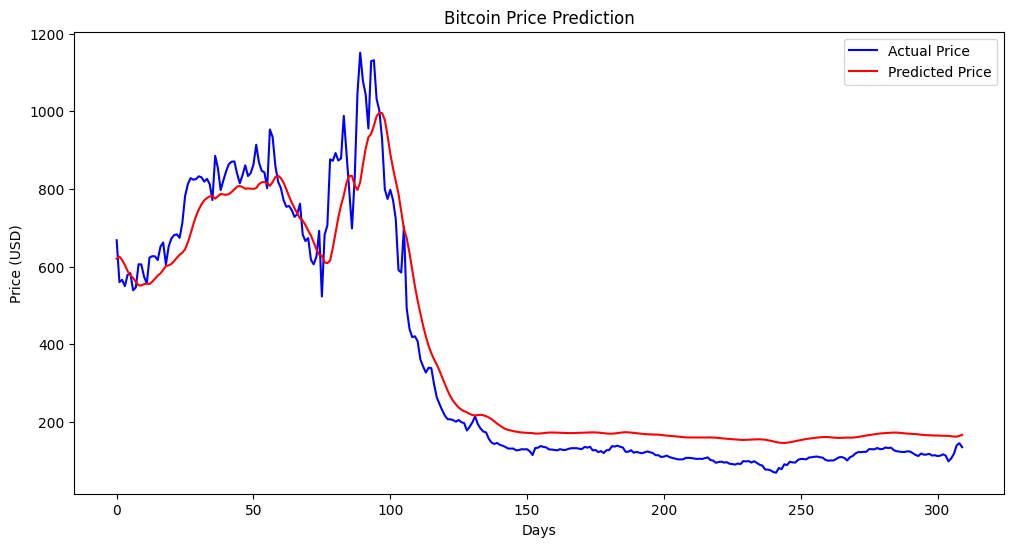

In [ ]:
# Predict test set prices
y_pred = model.predict(X_test)

# Convert back to original price scale
y_test_real = scaler.inverse_transform(y_test)
y_pred_real = scaler.inverse_transform(y_pred)

# Plot Predictions vs Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, label="Actual Price", color="blue")
plt.plot(y_pred_real, label="Predicted Price", color="red")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()


In [ ]:
# Get last sequence from test set
last_sequence = X_test[-1].reshape(1, time_steps, 1)

# Predict next 10 days
future_prices = []
for _ in range(10):
    next_price = model.predict(last_sequence)
    future_prices.append(next_price[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_price

# Convert predictions back to original scale
future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

print("Predicted Prices for Next 10 Days:")
print(future_prices.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<ipython-input-11-4364149f3ad8>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_price


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Prices for Next 10 Days:
[166.0517  170.24112 174.8877  179.4501  184.6331  190.92966 197.02498
 202.6659  207.89447 212.64667]


# Deep Learning

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product


from google.colab import files
uploaded = files.upload()

Saving 75-755845_naruto-narutouzumaki-narutoshippuden-kyubi-zorro-cute-naruto-wallpaper.png to 75-755845_naruto-narutouzumaki-narutoshippuden-kyubi-zorro-cute-naruto-wallpaper.png


<class 'numpy.ndarray'>


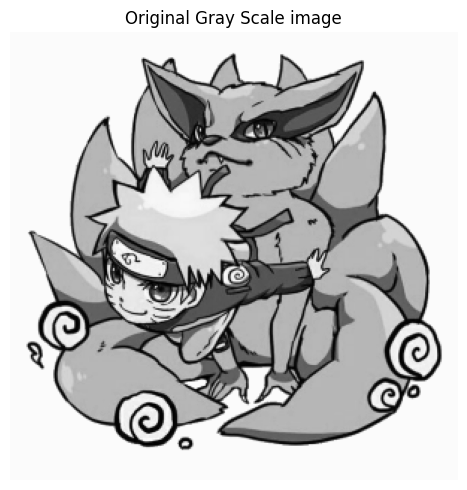

(1, 300, 300, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[ 1  1 -1]
 [ 1  8 -1]
 [ 1  1 -1]], shape=(3, 3), dtype=int32)
(3, 3)
(3, 3, 1, 1)
tf.Tensor(
[[[[ 1.]]

  [[ 1.]]

  [[-1.]]]


 [[[ 1.]]

  [[ 8.]]

  [[-1.]]]


 [[[ 1.]]

  [[ 1.]]

  [[-1.]]]], shape=(3, 3, 1, 1), dtype=float32)


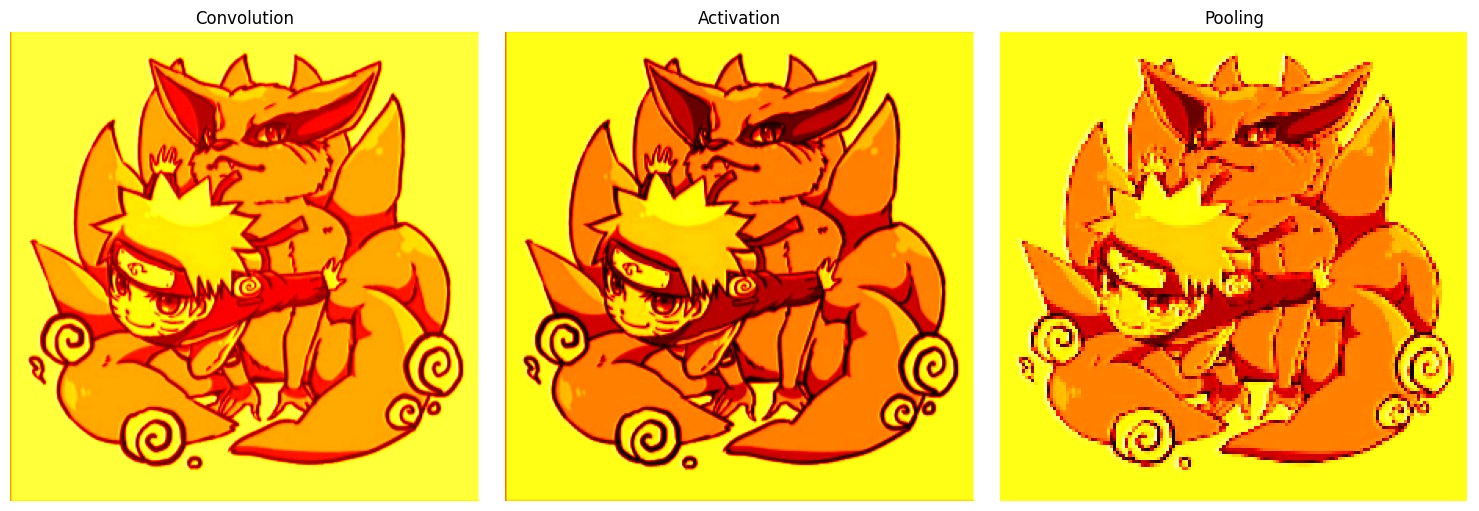

In [ ]:
# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='hot')

# define the kernel
kernel = tf.constant([[1, 1, -1],
                    [1,  8, -1],
                    [1, 1, -1],
                   ])

# load the image
image = tf.io.read_file('75-755845_naruto-narutouzumaki-narutoshippuden-kyubi-zorro-cute-naruto-wallpaper.png')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
print(type(img))
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
print(image.shape)
print(type(image))
print(kernel)
print(kernel.shape)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
print(kernel.shape)
kernel = tf.cast(kernel, dtype=tf.float32)
print(kernel)


# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

(X_train,y_train) , (X_test,y_test)=mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
print(X_train.shape)
print(X_test.shape)

X_train=X_train/255
X_test=X_test/255

model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train,y_train,epochs=3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9106 - loss: 0.3058
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - accuracy: 0.9836 - loss: 0.0527
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9894 - loss: 0.0329


In [ ]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
import matplotlib.pyplot as plt

def show_images(train_images,
                class_names,
                train_labels,
                nb_samples = 12, nb_row = 4):

    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1) # This line and the following lines within the loop had inconsistent indentation
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

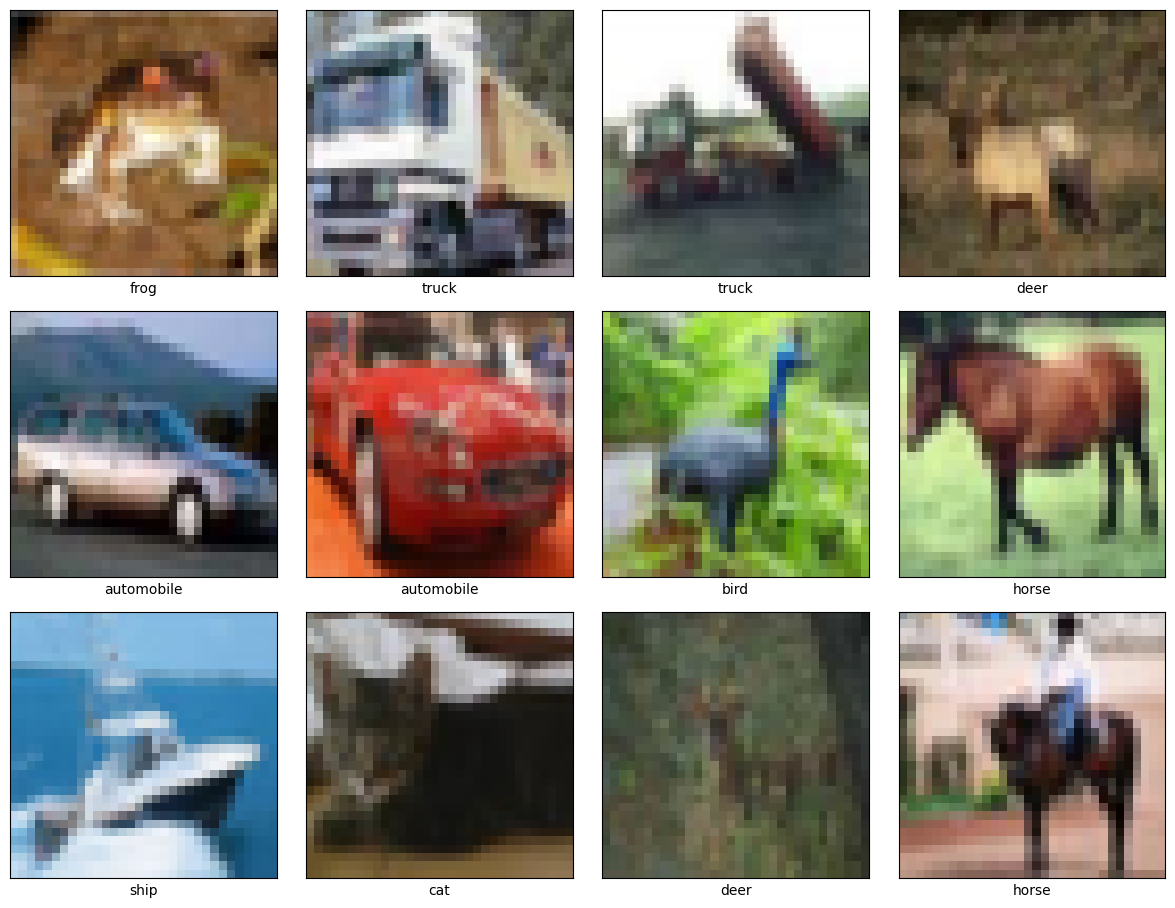

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [ ]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 74ms/step - accuracy: 0.3922 - loss: 1.6725 - precision: 0.6555 - recall: 0.1522 - val_accuracy: 0.5522 - val_loss: 1.2598 - val_precision: 0.7025 - val_recall: 0.3974
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 42ms/step - accuracy: 0.6175 - loss: 1.0973 - precision: 0.7634 - recall: 0.4576 - val_accuracy: 0.6403 - val_loss: 1.0360 - val_precision: 0.7656 - val_recall: 0.5080
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6734 - loss: 0.9381 - precision: 0.7910 - recall: 0.5528 - val_accuracy: 0.6738 - val_loss: 0.9424 - val_precision: 0.7686 - val_recall: 0.5737
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7170 - loss: 0.8180 - precision: 0.8147 - recall: 0.6202 - val_accuracy: 0.6842 - val_loss: 0.9204 - val_precision: 0.7780 - val_recall: 0.5826
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 50ms/step - accuracy: 0.7420 - loss: 0.7457 - precision: 0.8267 - recall: 0.6506 - val_accuracy: 

In [ ]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

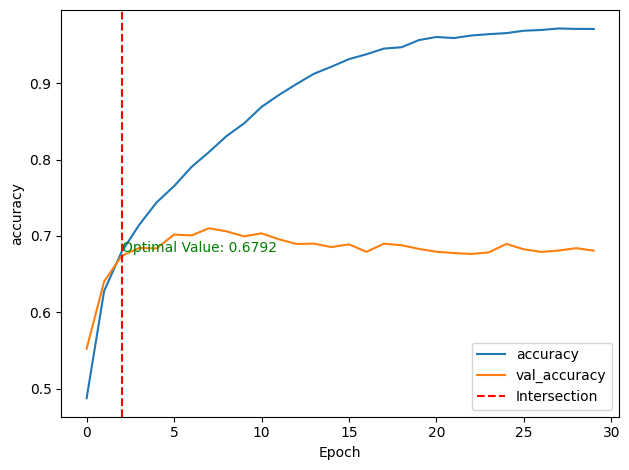

In [ ]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

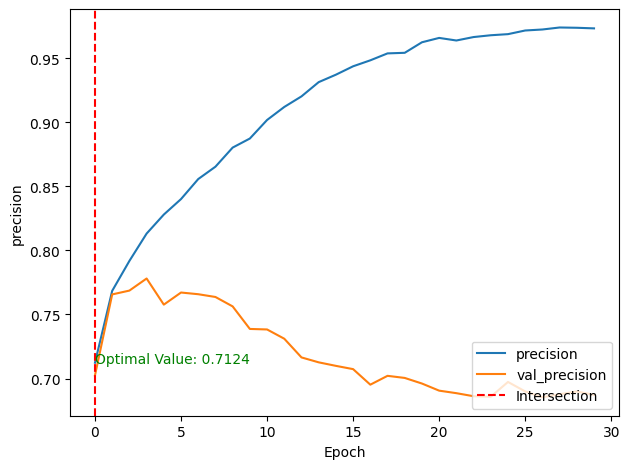

In [ ]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


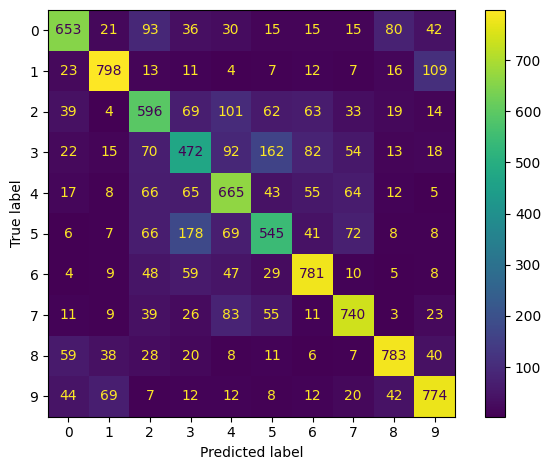

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()